In [51]:
import numpy as np
import pandas as pd
class Online_SGD:
    import warnings
    warnings.filterwarnings("ignore")


    def __init__(self,damp_factor=1.02):
        self.damp_factor = damp_factor

    def fit_online(self, X, Y,learning_rate=0.2):
        
        self.learning_rate = learning_rate

        # self.w = np.loadtxt(self.w_file).reshape(1, X.shape[1])  # Reading weights and bias
        # self.b = np.loadtxt(self.b_file).reshape(1, 1)


        for i in range(X.shape[0]):
            x = (np.array(X))[i].reshape(1, X.shape[1])
            y = (np.array(Y))[i].reshape(1, 1)
            Lw = np.dot((y - np.dot(x, self.w.T) - self.b), x)
            Lb = (y - np.dot(x, self.w.T) - self.b)
            self.w = self.w + self.learning_rate * Lw
            self.b = self.b + self.learning_rate * Lb
            self.learning_rate = self.learning_rate / self.damp_factor

        # a_file = open(self.w_file, "w")
        # for row in self.w:
        #     np.savetxt(a_file, row)
        # a_file.close()
        # b_file = open(self.b_file, "w")
        # for row in self.b:
        #     np.savetxt(b_file, row)
        # b_file.close()

        return self.w, self.b

    def fit_regression(self, X, Y):
        from sklearn.linear_model import LinearRegression
        reg = LinearRegression()
        reg.fit(X, Y)
        self.w = reg.coef_.reshape(1, X.shape[1])
        self.b = reg.intercept_.reshape(1, 1)
        # a_file = open(self.w_file, "w")
        # for row in self.w:
        #     np.savetxt(a_file, row)
        # a_file.close()
        # b_file = open(self.b_file, "w")
        # for row in self.b:
        #     np.savetxt(b_file, row)
        # b_file.close()

        return self.w, self.b

    def predict(self, X):
        # self.w = np.loadtxt(self.w_file).reshape(1, X.shape[1])  # Reading weights and bias
        # self.b = np.loadtxt(self.b_file).reshape(1, 1)
        m = np.dot(X, self.w.T) + self.b
        n = m.reshape(-1, )

        return n

In [52]:
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [53]:
dfX = pd.read_csv('X_VAR3.csv')
dfY = pd.read_csv('Y_VAR3.csv')
Data_X=dfX
Data_Y=dfY.iloc[:,0]
Data_X_train, Data_X_test, Data_y_train, Data_y_test = train_test_split(Data_X, Data_Y, test_size=0.3, random_state=0)

In [54]:
W=np.array([[0.5,0.7,-0.1]])
B=np.array([[0.0001]])

In [13]:
def coeff_error(w):
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    return(sqrt(mean_squared_error(W,w)))
def bias_error(b):
    return(sqrt(mean_squared_error(B,b)))
def pred_error(x,y):
    return np.sum(np.abs(x-y) / y.shape[0])

# Visualisation of Prediction, Coefficient and Bias error with different Learning Rates

In [55]:
pred_error_=[]
coeff_error_=[]
bias_error_=[]
Learning_rate=[]
x1=Data_X_test.iloc[0:5,:] #training dataset for online training
y1=Data_y_test.iloc[0:5]
x2=Data_X_test.iloc[5:10,:]#test dataset for online training
y2=Data_y_test.iloc[5:10]
lr=Online_SGD(damp_factor=1)
w_reg,b_reg=lr.fit_regression(Data_X_train,Data_y_train)
Data_y_pred = lr.predict(Data_X_test)

for i in range(1,20):    
    w,b=lr.fit_online(x1,y1,learning_rate=i/100)
    y=lr.predict(x2)
    pred_error_.append(pred_error(y2,y))
    coeff_error_.append(coeff_error(w))
    bias_error_.append(bias_error(b))
    Learning_rate.append(i/100)
    
    
    
error={"Prediction_Error":pred_error_,
      "Coefficient_Error":coeff_error_,
      "Bias_Error":bias_error_,
      "Learning_Rate":Learning_rate}

error_df=pd.DataFrame(error)
    

Text(0.5, 1.0, 'Prediction Error')

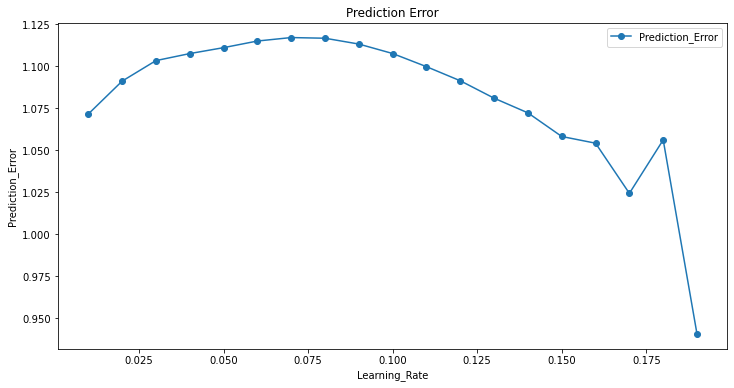

In [45]:
error_df.plot(x="Learning_Rate",y="Prediction_Error",marker='o',
              ylabel='Prediction_Error',figsize=(12,6)).set_title("Prediction Error")

Text(0.5, 1.0, 'Coeffeicient Error')

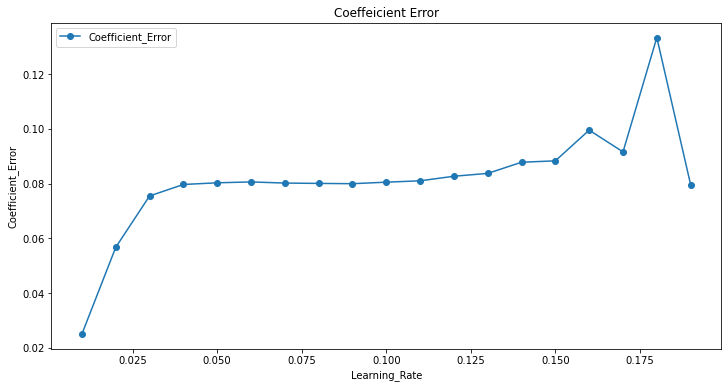

In [44]:
error_df.plot(x="Learning_Rate",y="Coefficient_Error",marker='o',
             ylabel="Coefficient_Error",figsize=(12,6)).set_title('Coeffeicient Error')

Text(0.5, 1.0, 'Bias Error')

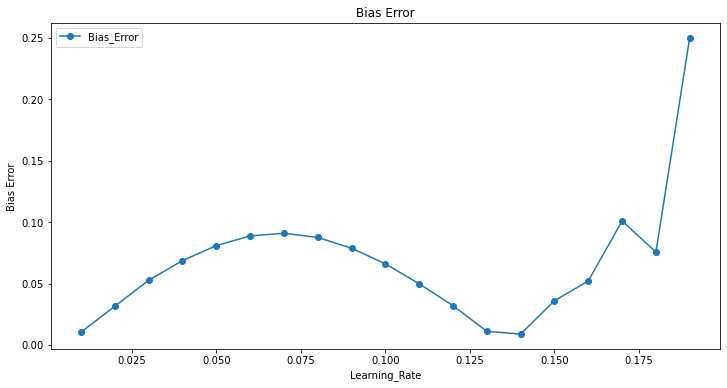

In [46]:
error_df.plot(x="Learning_Rate",y="Bias_Error",marker='o',
              ylabel='Bias Error',figsize=(12,6)).set_title('Bias Error')

# Visualisation of Errors with increase in sample in Online Learning

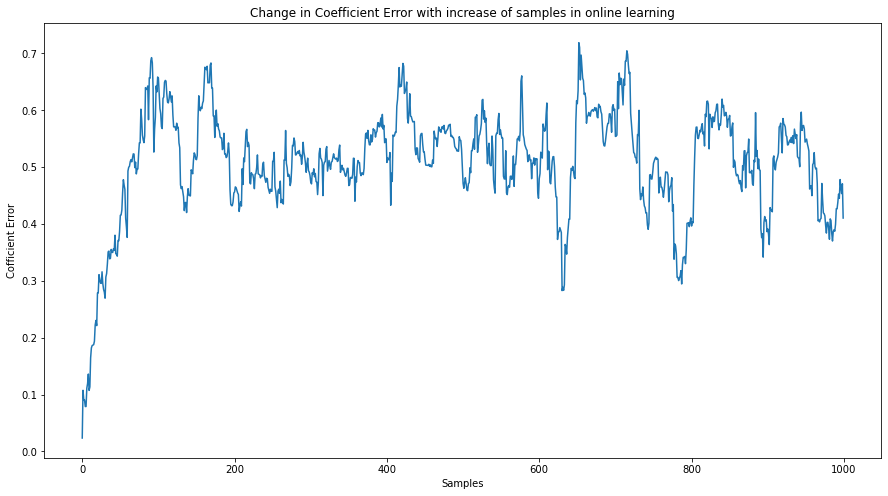

In [60]:
lr=Online_SGD(damp_factor=1)
coeff_error2=[]
bias_error2=[]
Sample=[]
w_reg,b_reg=lr.fit_regression(Data_X_train,Data_y_train)
for i in range(1000):
    m=Data_X_test.iloc[i,:].values.reshape(1,3)
    n=np.array(Data_y_train.iloc[i]).reshape(1,1)
    w,b=lr.fit_online(m,n,learning_rate=0.01)
    coeff_error2.append(coeff_error(w))
    bias_error2.append(bias_error(b))
    Sample.append(i)
plt.figure(figsize=(15,8)) 
plt.plot(Sample,coeff_error2)
plt.title("Change in Coefficient Error with increase of samples in online learning")
plt.ylabel('Cofficient Error')
plt.xlabel("Samples")
plt.show()

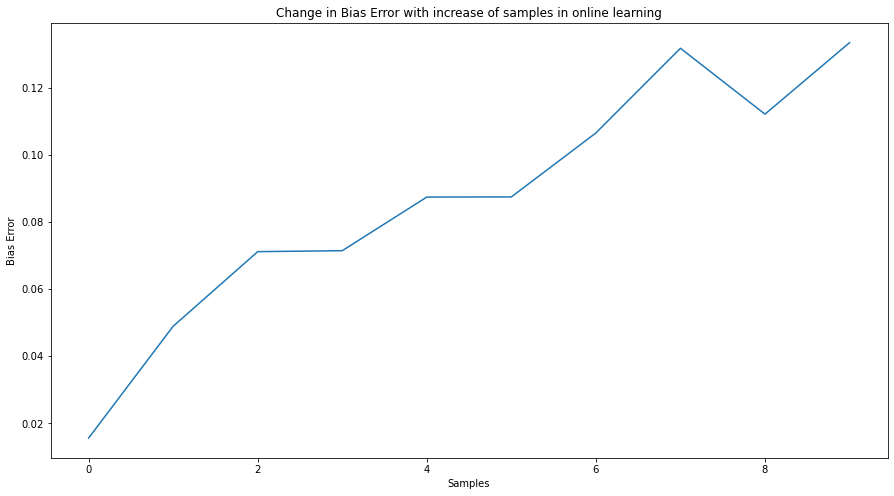

In [59]:
plt.figure(figsize=(15,8)) 
plt.plot(Sample,bias_error2)
plt.title("Change in Bias Error with increase of samples in online learning")
plt.ylabel('Bias Error')
plt.xlabel("Samples")
plt.show()